In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [60]:
lista_arquivos = os.listdir(r'./arqs/')
for arquivo in lista_arquivos:
    df = pd.read_csv(rf'./arqs/{arquivo}', delimiter=';')

In [61]:
df = pd.read_csv(r'./arqs/League of Legends Champion Stats 12.1.csv', sep=';')
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [62]:
print(f'Dimensoes: {df.shape}')
print(f'Nome das colunas: {df.columns.values.tolist()}')

Dimensoes: (232, 11)
Nome das colunas: ['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']


In [63]:
classes = df.Class.unique().tolist()
print(f'As classes do dataset são {classes}')

As classes do dataset são ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support', nan]


In [64]:
roles = df.Role.unique().tolist()
print(f'As roles nesse df são {roles}')

As roles nesse df são ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC']


In [65]:
df.isnull().sum()

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [66]:
df['Win %'] = df['Win %'].str[:-1]
df['Role %'] = df['Role %'].str[:-1]
df['Pick %'] = df['Pick %'].str[:-1]
df['Ban %'] = df['Ban %'].str[:-1]
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59,65.65,8.16,12.88,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57,34.06,4.24,12.88,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46,58.01,4.83,21.91,2.23


In [67]:
df[['Win %','Role %','Pick %','Ban %']] = df[['Win %','Role %','Pick %','Ban %']].apply(pd.to_numeric)

In [68]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

In [69]:
top_df = df.loc[df['Role'] == 'TOP'].reset_index()
jg_df = df.loc[df['Role'] == 'JUNGLE'].reset_index()
mid_df = df.loc[df['Role'] == 'MID'].reset_index()
adc_df = df.loc[df['Role'] == 'ADC'].reset_index()
sup_df = df.loc[df['Role'] == 'SUPPORT'].reset_index()

In [70]:
contagem_de_classes = df.groupby('Class').Name.count().reset_index()
contagem_de_classes

,Class,Name
0,Assassin,26
1,Fighter,68
2,Mage,62
3,Marksman,31
4,Support,16
5,Tank,28


In [71]:
contagem_de_roles = df.groupby('Role').Name.count().reset_index()
contagem_de_roles

,Role,Name
0,ADC,27
1,JUNGLE,46
2,MID,58
3,SUPPORT,41
4,TOP,60


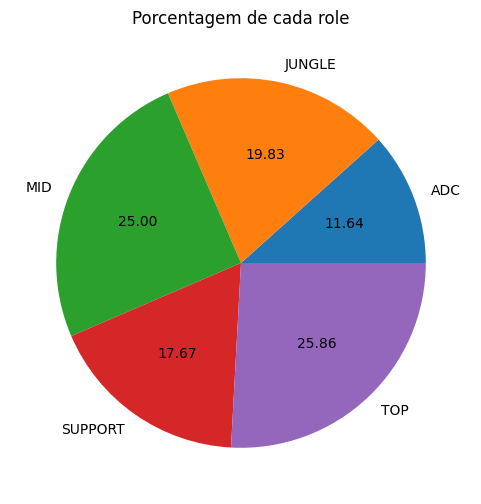

In [72]:
plt.figure(figsize=(14,6))
plt.pie(contagem_de_roles.Name, labels=contagem_de_roles.Role, autopct='%.2f')
plt.title('Porcentagem de cada role')
plt.show()

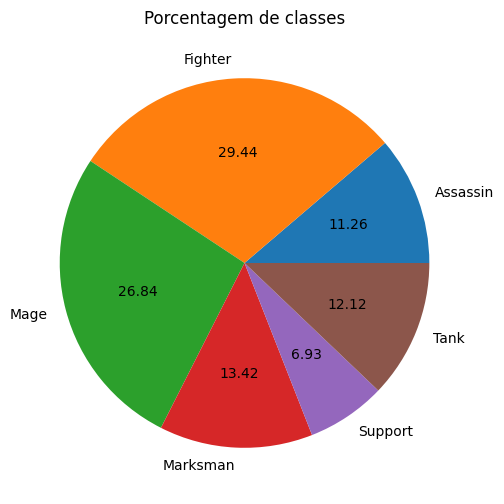

In [73]:
plt.figure(figsize=(14,6))
plt.pie(contagem_de_classes.Name, labels=contagem_de_classes.Class, autopct='%.2f')
plt.title('Porcentagem de classes')
plt.show()

In [74]:
df_adc = adc_df.copy()
df_adc = df_adc.sort_values(by=['Pick %'], ascending=False).reset_index()
df_adc.head()

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,6,69,Jhin,Marksman,ADC,God,94.23,3.23,51.03,99.02,24.55,5.81,3.01
1,7,70,Jinx,Marksman,ADC,God,86.76,-1.22,51.32,99.51,22.27,6.98,2.43
2,2,21,Caitlyn,Marksman,ADC,God,88.48,-0.16,50.09,98.70,21.30,18.96,2.31
3,4,37,Ezreal,Marksman,ADC,God,75.98,1.83,49.28,97.47,20.07,5.20,2.39
4,8,71,Kai'Sa,Marksman,ADC,God,75.52,10.50,49.48,97.77,19.45,5.95,2.42


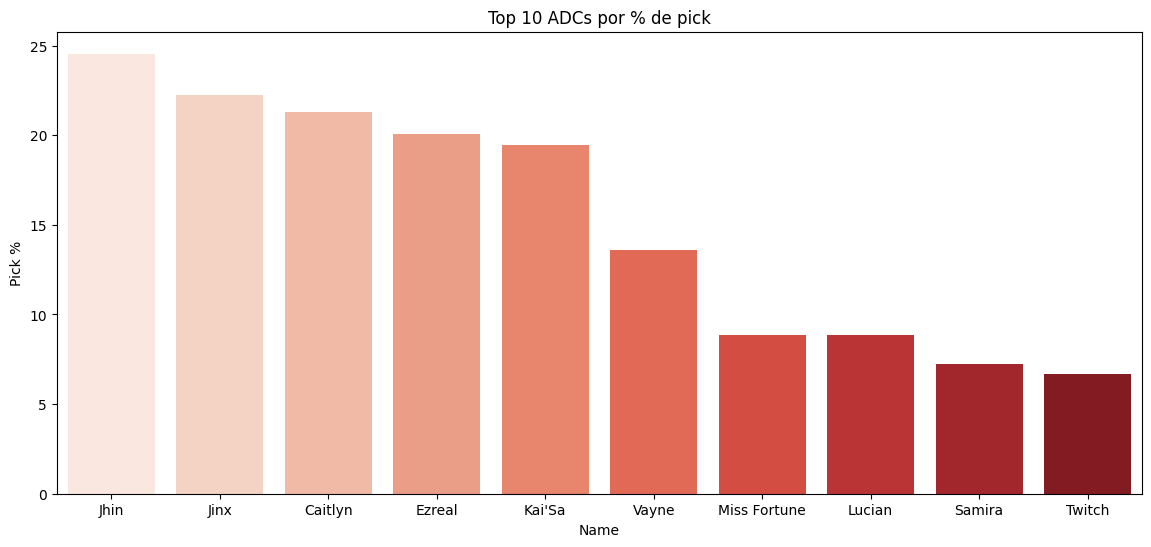

In [75]:
plt.figure(figsize=(14,6))
sns.barplot(x='Name', y='Pick %', data=df_adc[:10], palette='Reds')
plt.title('Top 10 ADCs por % de pick')
plt.show()

In [76]:
df_jungle = jg_df.copy()
df_jungle = df_jungle.sort_values(by=['Pick %'], ascending=False).reset_index()
df_jungle.head()

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,17,90,Lee Sin,Fighter,JUNGLE,God,91.89,0.28,48.45,96.61,15.29,16.26,2.82
1,39,201,Viego,Assassin,JUNGLE,God,82.48,0.59,49.74,94.84,13.03,14.22,2.46
2,1,29,Diana,Fighter,JUNGLE,God,82.96,44.71,51.46,83.98,12.19,12.81,2.49
3,14,81,Kayn,Fighter,JUNGLE,S,69.12,1.38,49.95,97.80,9.70,12.18,2.41
4,9,54,Hecarim,Fighter,JUNGLE,S,71.27,12.91,51.18,99.23,8.94,8.04,3.02


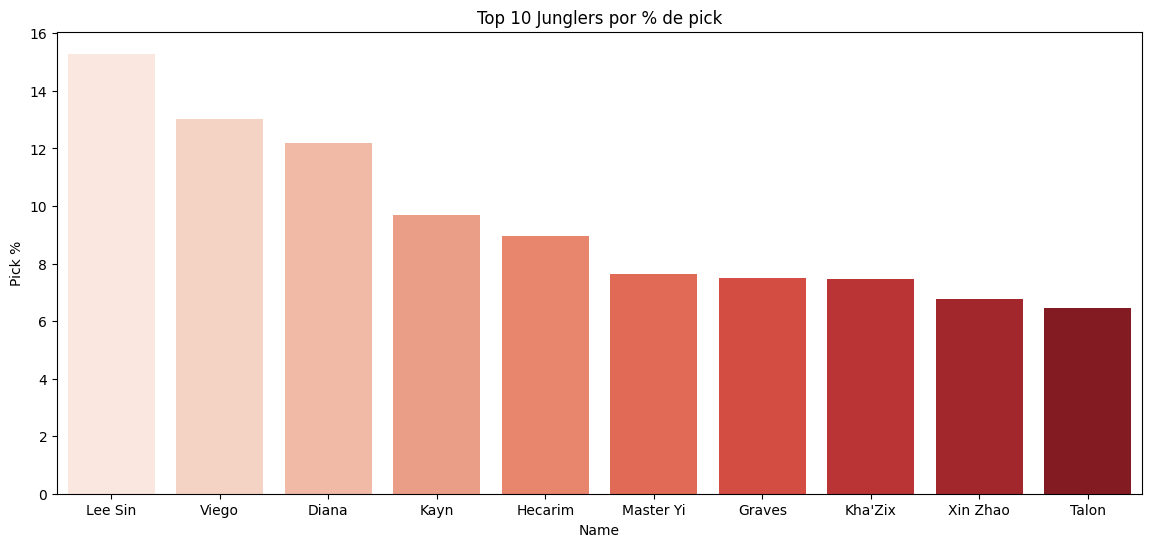

In [77]:
plt.figure(figsize=(14,6))
sns.barplot(x='Name', y='Pick %', data=df_jungle[:10], palette='Reds')
plt.title('Top 10 Junglers por % de pick')
plt.show()

<Figure size 1400x1000 with 0 Axes>

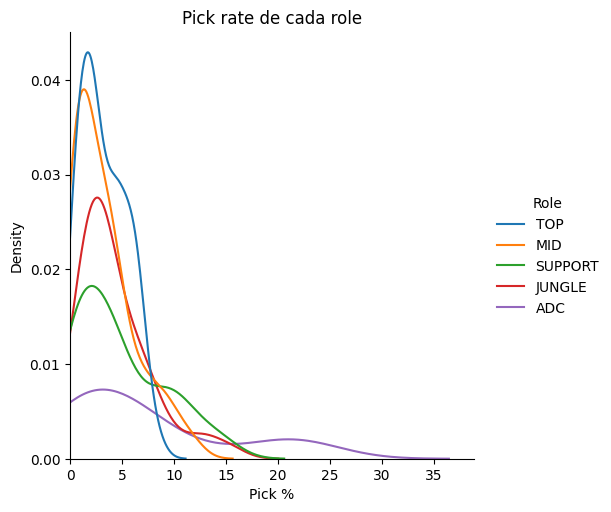

In [78]:
plt.figure(figsize=(14,10))
sns.displot(x='Pick %', data=df, hue='Role', kind='kde')
plt.xlim(0)
plt.title('Pick rate de cada role')
plt.show()

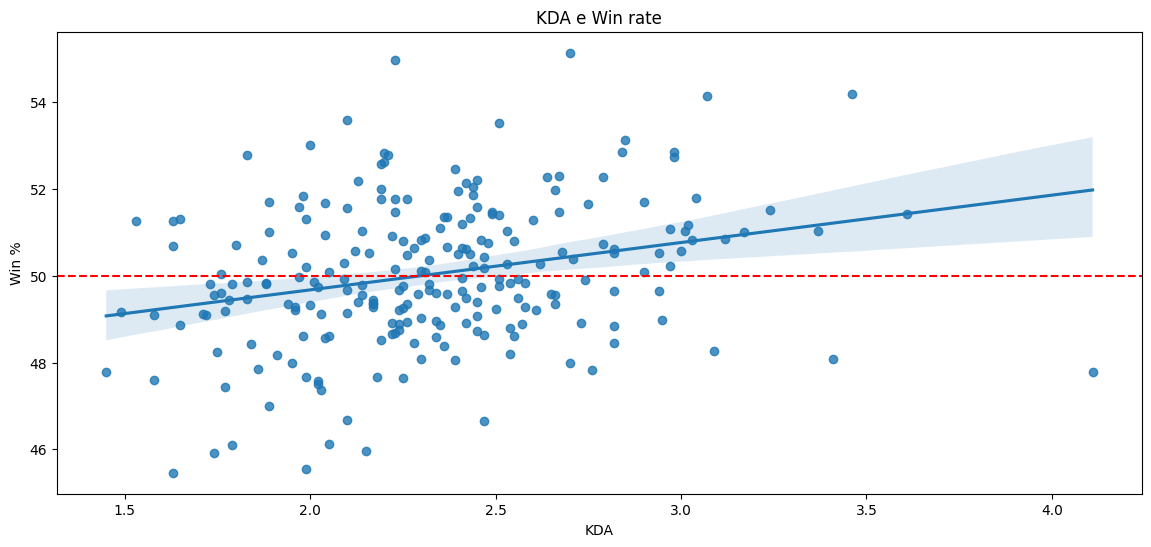

In [79]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='KDA', y='Win %', data=df)
graph.axhline(50, color='red', ls='--')
plt.title('KDA e Win rate')
plt.show()

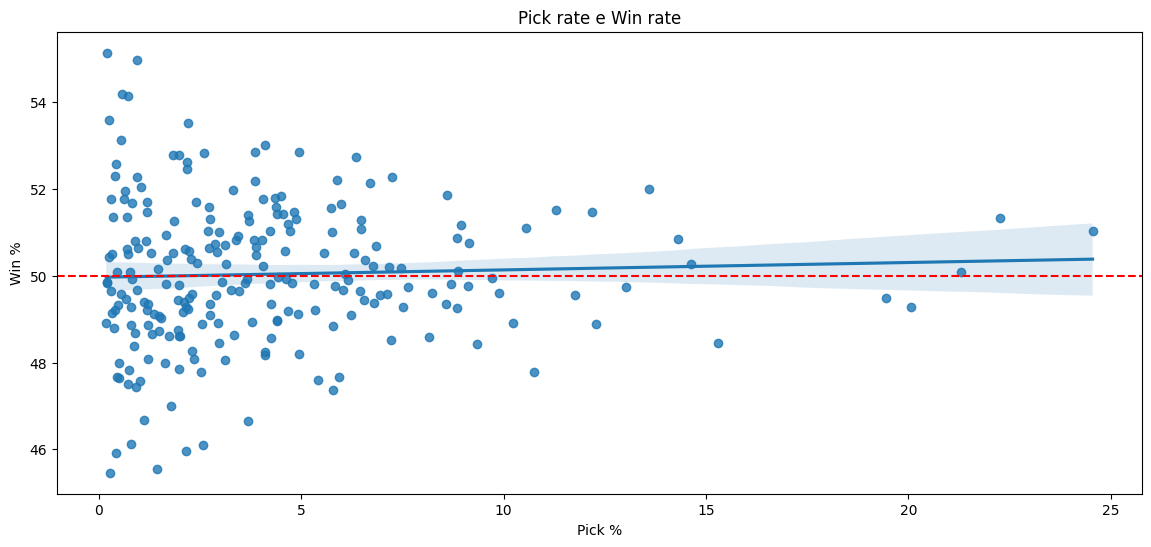

In [80]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='Pick %',y='Win %', data=df)
graph.axhline(50, color='red',ls='--')
plt.title('Pick rate e Win rate')
plt.show()

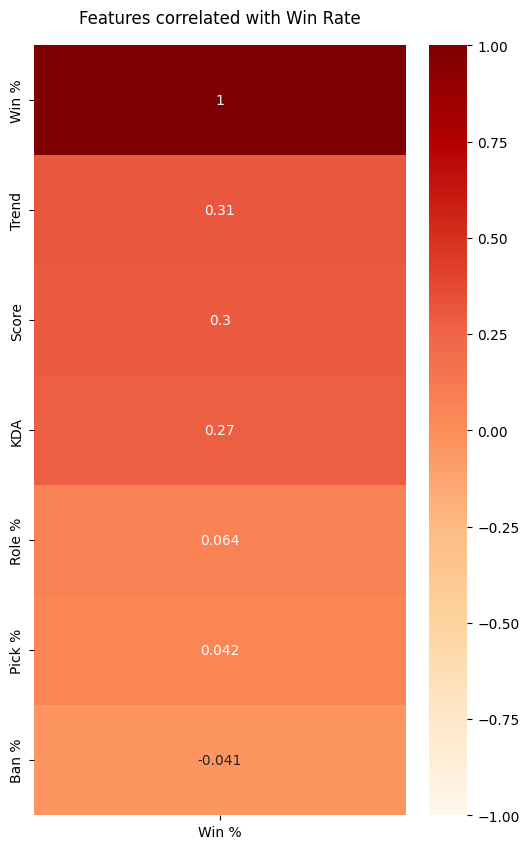

In [81]:
plt.figure(figsize=(6, 10))
df = df.select_dtypes(include=np.number)
corr_matrix = df.corr()

sns.heatmap(corr_matrix[['Win %']].sort_values(by='Win %', ascending=False), vmin=-1, vmax=1, annot=True, cmap='OrRd')
plt.title('Features correlated with Win Rate', pad =16)
plt.show()